# 第二次作业

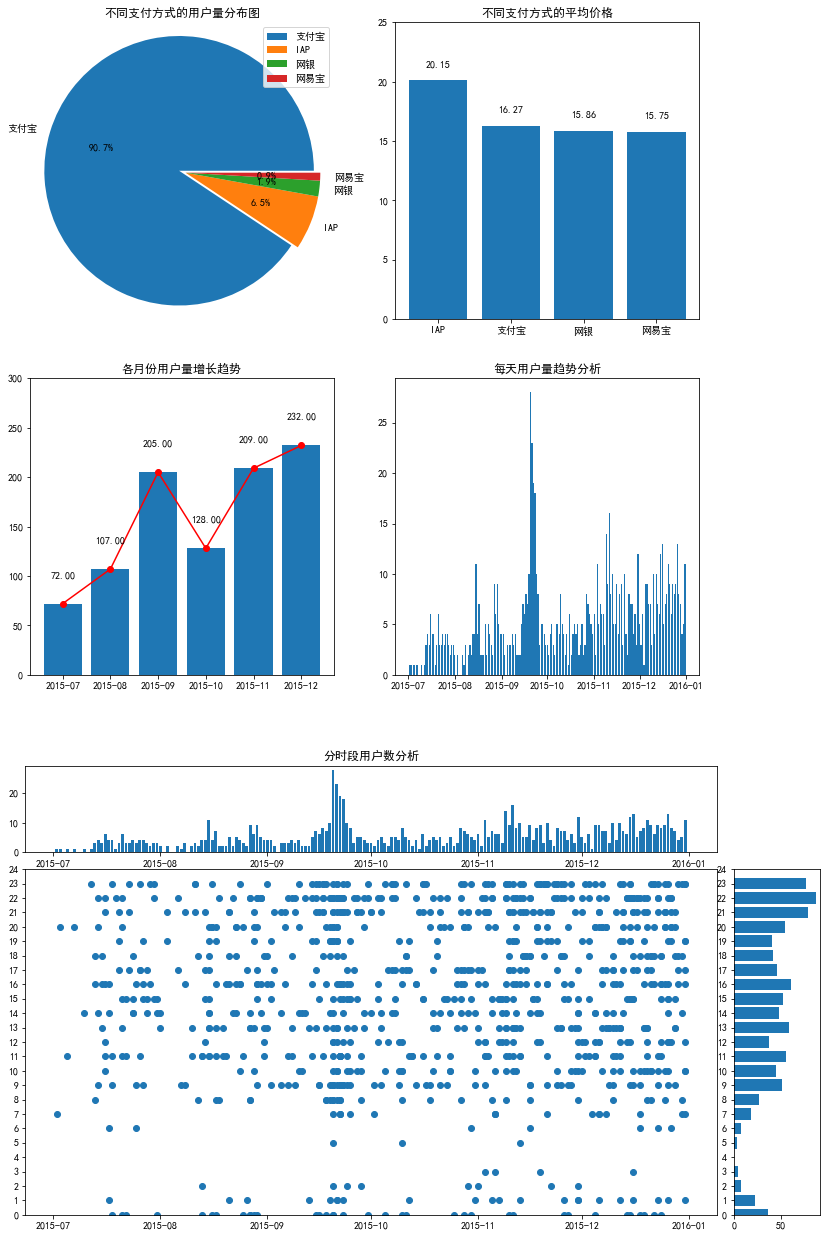

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates as mdates

df = pd.read_csv('OutOrder.csv', encoding='gbk')
df["订单ID"] = df["订单ID"].astype(object)
df['时间'] = pd.to_datetime(df['时间'])
df['日期'] = df.apply(lambda row: row['时间'].date(), axis=1)
df['年月'] = df.apply(lambda row: row['日期'].isoformat()[0:7], axis=1)
df['小时'] = df.apply(lambda row: row['时间'].hour, axis=1)

# 筛选排序
# df2 = df[df['方式'].str.contains('网')].head().sort_values(by=['方式','日期'],ascending=[0,1]).ix[:,[2,4,1]]

fig = plt.figure(figsize=(12, 12))

ax0 = fig.add_subplot('221')
ax1 = fig.add_subplot('222')
ax2 = fig.add_subplot('223')
ax3 = fig.add_subplot('224')

# 不同支付方式的用户量分布图
g_type_user = df.groupby('方式')['金额'].count().sort_values(ascending=False)
explode = np.zeros(len(g_type_user.index))
explode[0] = 0.05
ax0.pie(g_type_user, autopct='%3.1f%%', labels=g_type_user.index, startangle=0, explode=explode)
ax0.axis('equal')
ax0.legend()
ax0.set_title('不同支付方式的用户量分布图')

# 不同支付方式的平均价格
g_type_user = df.groupby('方式')['金额'].mean().sort_values(ascending=False)
X = np.arange(len(g_type_user.index))
Y = g_type_user.values
ax1.bar(X, Y)
ax1.set_xticks(X)
ax1.set_xticklabels(g_type_user.index)
for x, y in zip(X, Y):
    ax1.text(x, y+1, '%.2f'%y, ha='center', va='bottom')
ax1.set_ylim(0, 25)
ax1.set_title('不同支付方式的平均价格')

# 各月份用户量增长趋势
g_ym_user = df.groupby('年月')['金额'].count().sort_index()
X = np.arange(len(g_ym_user.index))
Y = g_ym_user.values
ax2.bar(X, Y)
ax2.plot(X, Y,'r')
ax2.plot(X, Y,'ro')
ax2.set_xticks(X)
ax2.set_xticklabels(g_ym_user.index)
for x, y in zip(X, Y):
    ax2.text(x, y+25, '%.2f'%y, ha='center', va='bottom')
ax2.set_ylim(0, 300)
ax2.set_title('各月份用户量增长趋势')

# 每天用户量趋势分析
group_date = df.groupby('日期')['金额'].count().sort_index()
X = group_date.index
Y = group_date.values
ax3.bar(X,Y)
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax3.set_title('每天用户量趋势分析')

# 分时段用户数分析
g_hour_user = df.groupby('小时')['金额'].count().sort_index()
X_hour = g_hour_user.index
Y_hour = g_hour_user.values

g_date_user = df.groupby('日期')['金额'].count().sort_index()
X_date = g_date_user.index
Y_date = g_date_user.values

left, bottom = 0.12, -0.5
width, height = 0.8, 0.4
left_h = left + width + 0.02
bottom_h = bottom + height + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.1]
rect_histy = [left_h, bottom, 0.1, height]

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

axScatter.plot(df['日期'], df['小时'], 'o')
axScatter.yaxis.set_major_locator(MultipleLocator(1))
axScatter.set_ylim([0,24])
axHistx.bar(X_date, Y_date)
axHisty.barh(X_hour, Y_hour)
axHistx.set_xlim(axScatter.get_xlim())
axHistx.set_title('分时段用户数分析')
axHisty.set_ylim(axScatter.get_ylim())
axHisty.yaxis.set_major_locator(MultipleLocator(1))

plt.show()

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('OutOrder.csv', encoding='gbk')
df['订单ID'] = df['订单ID'].astype(object)
df['时间'] = pd.to_datetime(df['时间'])
df['日期'] = df.apply(lambda row: row['时间'].date(), axis=1)
df['年月'] = df.apply(lambda row: row['日期'].isoformat()[0:7], axis=1)
# df = df.sort_values('时间')
# df2 = df.set_index('时间')
# df2['20151001':'20151031'].head()
df2 = df[df['方式'].str.contains('网')].head().sort_values(by=['方式','日期'],ascending=[0,1]).ix[:,[2,4,1]]
df2

方式          日期    金额
164   网银  2015-07-15  10.0
101   网银  2015-08-06  15.0
88    网银  2015-08-13  15.0
232   网银  2015-10-20  18.0
142  网易宝  2015-07-21  10.0

6    232
5    209
3    205
4    128
2    107
1     72
Name: year-month-No, dtype: int64


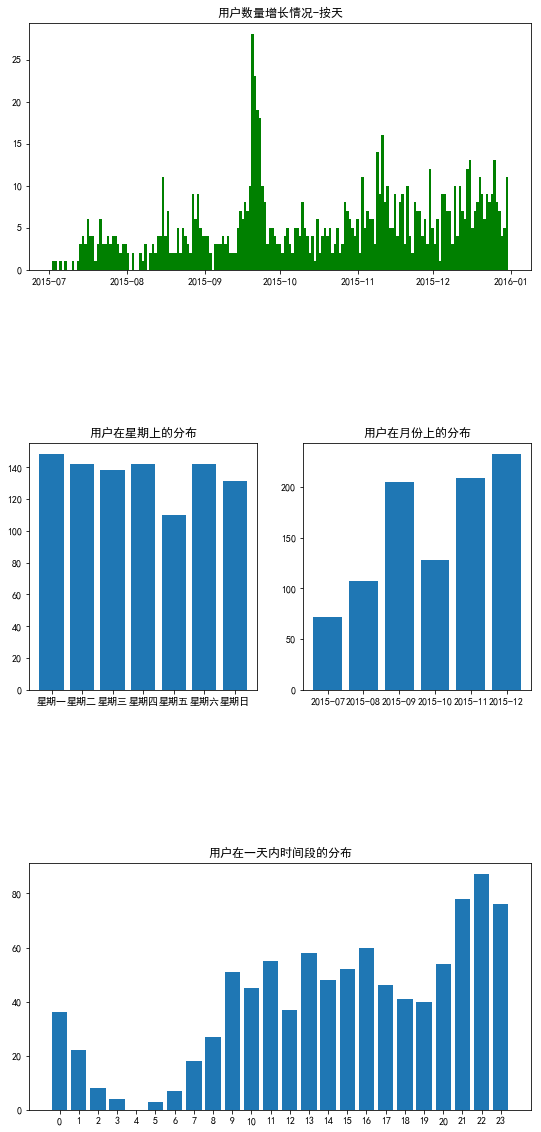

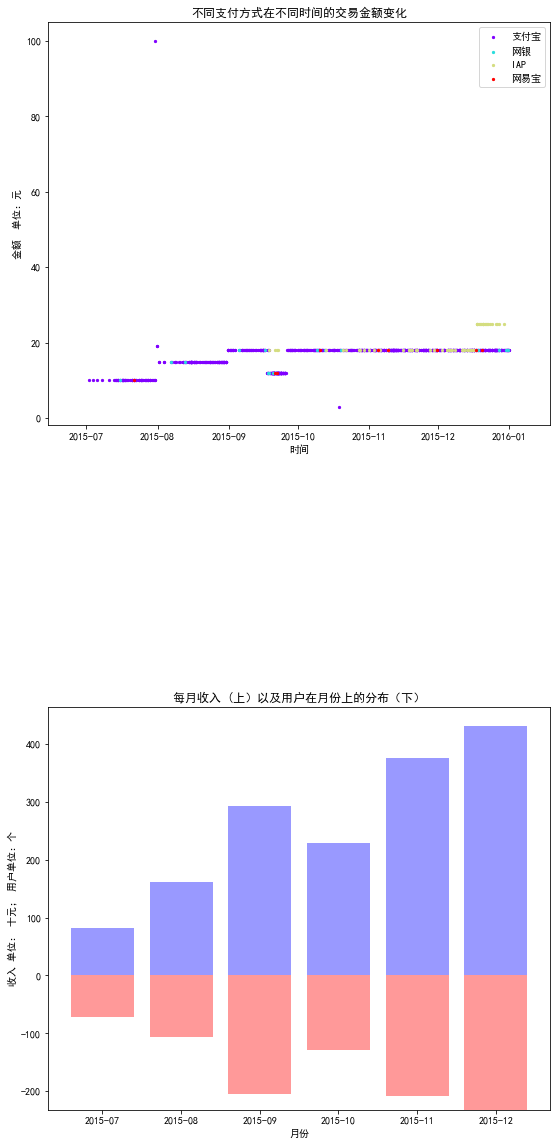

In [2]:
from datetime import datetime
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#设置美化格式
# plt.style.use('bmh')

#星期字典
week_dict = {1:'星期一', 2:'星期二', 3:'星期三', 4:'星期四', 5:'星期五', 6:'星期六', 7:'星期日'}

#将文件读到dataframe中
def readOrders(file_name): 
    data = pd.read_csv(file_name, encoding='gbk')
    #修改列名为英文
    data = data.rename(columns={'订单ID': 'id', '金额': 'money','方式': 'channel','时间':'time'})

    #从字符串得到日期类型
    #时间格式(包括日期和时间)
    time_str = '%m/%d/%Y %H:%M'
    data['datetime'] = data.apply(lambda row: datetime.strptime(row['time'], time_str), axis=1)

    #时间格式,只有时间
    data['date'] = data.apply(lambda row: row['datetime'].date(), axis=1)

    #月份，这个有问题，查了很久解决不了，目前只在2015年能用，不知道如何在2016年将年份区别开
    #data['month'] = data.apply(lambda row: row['datetime'].month, axis=1)

    #增加了老师提供的方法，将年和月作为index
    data['year-month'] = data.apply(lambda row: row['datetime'].isoformat()[0:7], axis=1)
    #print(data['year-month'])

    #year-month排序后的序号，这样才能在bar中画图
    #得到data['year-month']中的set
    sorted_year_month_list = sorted(set(data['year-month'].tolist()), reverse=False)
    #print(sorted_year_month_list)
    #年-月组成的字符串排序后放入字典，以便后面使用
    year_month_No_dict = {}
    num = 1
    for year_month in sorted_year_month_list:
        year_month_No_dict[year_month] = num
        num += 1
    data['year-month-No'] = data.apply(lambda row: year_month_No_dict[row['year-month']], axis=1)

    #增加星期列，数字
    data['week_id'] = data.apply(lambda row: row['datetime'].weekday()+1, axis=1)
    #增加星期列，名称
    data['week_name'] = data.apply(lambda row: week_dict[row['week_id']], axis=1)

    #小时，几点
    data['hour'] = data.apply(lambda row: row['datetime'].hour, axis=1)

    #返回结果按照时间排序
    return data


#用户分析
def userAnalysis(data):

    fig = plt.figure(figsize=(9,20))#figsize=(10,6)

    #行, 列, 序号
    ax0 = fig.add_subplot(311) 
    ax1 = fig.add_subplot(323)
    ax2 = fig.add_subplot(324)
    ax3 = fig.add_subplot(313)

    #用户增长趋势分析，按天
    N = 1 #设置分布宽度
    date_list = data['date'].tolist()
    #修改了上次的错误，用最大日期减去最小日期之间的天数+1作为bins的参数
    ax0.hist(date_list, bins=int((max(date_list) - min(date_list)).days)+1, normed=0, histtype='bar', facecolor='g', alpha=1)
    ax0.set_title('用户数量增长情况-按天')


    #用户在星期上的分布
    week_count = data['week_id'].value_counts()

    ax1.bar(week_count.index.values.tolist(),week_count.values.tolist(),align="center")
    ax1.set_xticks(list(range(1,8)))
    ax1.set_xticklabels(week_dict.values())
    ax1.set_title('用户在星期上的分布')

    #用户在月份上的分布
    month_count = data['year-month-No'].value_counts()
    print(month_count)
    ax2.bar(month_count.index.values.tolist(),month_count.values.tolist(),align="center")
    ax2.set_xticks(range(min(data['year-month-No']), max(data['year-month-No'])+1))
    ax2.set_xticklabels(sorted(set(data['year-month'].tolist()), reverse=False))

    ax2.set_title('用户在月份上的分布')

    #用户在每天时间段上的分布
    hour_count = data['hour'].value_counts()
    ax3.bar(hour_count.index.values.tolist(),hour_count.values.tolist())
    ax3.set_xticks(list(range(0,24)))

    data['year-month']
    ax3.set_title('用户在一天内时间段的分布')


    fig.subplots_adjust(hspace=0.7)
    plt.show()


#价格收入等分析
def moneyAnalysis(data):
    import matplotlib.cm as cm
    import itertools

    fig = plt.figure(figsize=(9,20))#figsize=(10,6)

    #行, 列, 序号
    ax0 = fig.add_subplot(211) 
    ax1 = fig.add_subplot(212)


    #不同支付方式在不同时间的价格变化
    channels = set(data['channel'].tolist())
    #生成颜色列表
    colors =   iter(cm.rainbow(np.linspace(0, 1, len(channels))))
    for channel in channels:
        date_list = data[data['channel']==channel]['datetime'].tolist()
        money_list = data[data['channel']==channel]['money'].tolist()
        ax0.scatter(date_list,money_list,label=channel,s=5,color=next(colors))
    ax0.legend()
    ax0.set_title('不同支付方式在不同时间的交易金额变化')
    ax0.set_ylabel(u'金额  单位：元')
    ax0.set_xlabel(u'时间')



    #收入在月份上的变化
    money_month = data.groupby('year-month-No').sum()['money']
    #将money除以1000
    monty_month_value = [x/10  for x in money_month.values.tolist()]
    ax1.bar(money_month.index.values.tolist(),monty_month_value,facecolor='#9999ff',align="center")

    #用户在月份上的分布
    month_count = data['year-month-No'].value_counts()
    #将数据变为负数
    neg_month_count = [-x for x in month_count.values.tolist()]
    ax1.bar(month_count.index.values.tolist(),neg_month_count, facecolor='#ff9999',align="center")
    ax1.set_xticks(range(min(data['year-month-No']), max(data['year-month-No'])+1))
    ax1.set_xticklabels(sorted(set(data['year-month'].tolist()), reverse=False))


    ax1.set_title('每月收入 (上）以及用户在月份上的分布（下）')
    ax1.set_ylabel(u'收入 单位： 十元； 用户单位：个')
    ax1.set_xlabel(u'月份')


    fig.subplots_adjust(hspace=0.7)
    plt.show()

if __name__ == '__main__':

    data = readOrders('OutOrder.csv')
    #用户分析
    userAnalysis(data)
    moneyAnalysis(data)